# This is from the BUCC Data Science Workshop I Attended In 2019 

In [190]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
#visualizations
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#algorithms
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#score metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Data Preprocessing

In [191]:

alf_path = '/kaggle/input/d/suhailsh7/acute-liver-failure/ALF_Data.csv'
df = pd.read_csv(alf_path)
copy_df=df
df.head(10)

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
5,26,F,east,119.3,193.2,31.96,1.0,117.9,129.0,70.0,...,0.0,0,0.0,1,0.0,0,0.0,0.0,0.0,0.0
6,66,F,north,85.1,172.1,28.73,0.0,99.2,137.0,92.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
7,59,M,east,69.9,160.9,27.00,0.0,101.5,124.0,73.0,...,0.0,0,0.0,1,1.0,1,0.0,0.0,0.0,0.0
8,53,M,east,75.2,174.1,24.81,0.0,85.6,110.0,74.0,...,0.0,1,1.0,1,0.0,0,0.0,0.0,0.0,0.0
9,78,M,north,47.6,155.3,19.74,0.0,70.3,170.0,78.0,...,0.0,0,1.0,0,1.0,1,1.0,0.0,NaN,0.0


In [192]:
df.shape

(8785, 30)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     8785 non-null   int64  
 1   Gender                  8785 non-null   object 
 2   Region                  8785 non-null   object 
 3   Weight                  8591 non-null   float64
 4   Height                  8594 non-null   float64
 5   Body Mass Index         8495 non-null   float64
 6   Obesity                 8495 non-null   float64
 7   Waist                   8471 non-null   float64
 8   Maximum Blood Pressure  8481 non-null   float64
 9   Minimum Blood Pressure  8409 non-null   float64
 10  Good Cholesterol        8768 non-null   float64
 11  Bad Cholesterol         8767 non-null   float64
 12  Total Cholesterol       8769 non-null   float64
 13  Dyslipidemia            8785 non-null   int64  
 14  PVD                     8785 non-null   

In [194]:
#dropping samples that dont have value fore ALF
df = df.dropna(axis = 0, subset=['ALF'])

In [195]:
total_missingvalues = df.isnull().sum()
total_missingvalues

Age                         0
Gender                      0
Region                      0
Weight                    133
Height                    139
Body Mass Index           206
Obesity                   206
Waist                     215
Maximum Blood Pressure    206
Minimum Blood Pressure    252
Good Cholesterol            8
Bad Cholesterol             8
Total Cholesterol           6
Dyslipidemia                0
PVD                         0
Physical Activity           8
Education                  15
Unmarried                 301
Income                    792
Source of Care              0
PoorVision                376
Alcohol Consumption         0
HyperTension               53
Family  HyperTension        0
Diabetes                    1
Family Diabetes             0
Hepatitis                  13
Family Hepatitis            3
Chronic Fatigue            26
ALF                         0
dtype: int64

In [196]:
#selecting a sample of the features for easier understanding
df = df[['Age','Gender','Region','Weight','Height','Body Mass Index','Obesity','Waist',
         'Maximum Blood Pressure','Minimum Blood Pressure','Good Cholesterol','Bad Cholesterol',
         'Total Cholesterol','Dyslipidemia','PVD','ALF']]

df.head()

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,Total Cholesterol,Dyslipidemia,PVD,ALF
0,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,297.0,0,0,0.0
1,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,166.0,0,0,0.0
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,255.0,1,0,0.0
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,230.0,0,0,0.0
4,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,221.0,0,0,0.0


<AxesSubplot:>

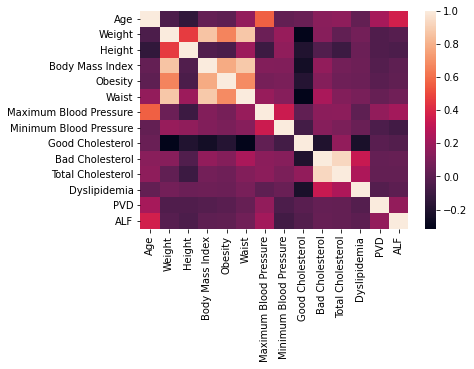

In [197]:
#refer to slide for heat map 
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [198]:
df.corr()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,Total Cholesterol,Dyslipidemia,PVD,ALF
Age,1.000000,-0.050172,-0.144693,0.027283,0.006385,0.172103,0.559924,0.021252,0.040315,0.137215,0.153442,0.023648,0.224636,0.367639
Weight,-0.050172,1.000000,0.462434,0.863367,0.661514,0.876139,0.049158,0.178549,-0.314954,0.134971,0.018215,0.074894,-0.039535,-0.019161
Height,-0.144693,0.462434,1.000000,-0.035309,-0.056179,0.194758,-0.105991,0.161928,-0.198248,-0.032763,-0.106934,0.046492,-0.041663,-0.050380
Body Mass Index,0.027283,0.863367,-0.035309,1.000000,0.780720,0.878641,0.119642,0.112332,-0.244222,0.163155,0.073130,0.053456,-0.023932,0.004539
Obesity,0.006385,0.661514,-0.056179,0.780720,1.000000,0.683162,0.082194,0.093112,-0.181913,0.122603,0.055699,0.049277,-0.011788,0.008785
Waist,0.172103,0.876139,0.194758,0.878641,0.683162,1.000000,0.180777,0.127650,-0.311044,0.235290,0.121066,0.088227,0.029557,0.060799
Maximum Blood Pressure,0.559924,0.049158,-0.105991,0.119642,0.082194,0.180777,1.000000,0.345462,0.014680,0.142782,0.149447,0.003650,0.163933,0.216645
Minimum Blood Pressure,0.021252,0.178549,0.161928,0.112332,0.093112,0.127650,0.345462,1.000000,-0.083515,0.128895,0.098159,0.041815,-0.052034,-0.087266
Good Cholesterol,0.040315,-0.314954,-0.198248,-0.244222,-0.181913,-0.311044,0.014680,-0.083515,1.000000,-0.205911,0.166838,-0.223128,-0.009408,-0.031826
Bad Cholesterol,0.137215,0.134971,-0.032763,0.163155,0.122603,0.235290,0.142782,0.128895,-0.205911,1.000000,0.930502,0.329475,0.025287,0.033539


In [199]:
y = df['ALF']
df = df.drop('ALF',axis=1)
df.head()

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,Total Cholesterol,Dyslipidemia,PVD
0,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,297.0,0,0
1,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,166.0,0,0
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,255.0,1,0
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,230.0,0,0
4,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,221.0,0,0


In [200]:
total_missingvalues = df.isnull().sum()
total_missingvalues

Age                         0
Gender                      0
Region                      0
Weight                    133
Height                    139
Body Mass Index           206
Obesity                   206
Waist                     215
Maximum Blood Pressure    206
Minimum Blood Pressure    252
Good Cholesterol            8
Bad Cholesterol             8
Total Cholesterol           6
Dyslipidemia                0
PVD                         0
dtype: int64

In [201]:
#Taking care of missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df.iloc[:,3:13]) #SELECTING THE COLUMN WITH MISSING VALUES
df.iloc[:,3:13] = imputer.transform(df.iloc[:,3:13])

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     6000 non-null   int64  
 1   Gender                  6000 non-null   object 
 2   Region                  6000 non-null   object 
 3   Weight                  6000 non-null   float64
 4   Height                  6000 non-null   float64
 5   Body Mass Index         6000 non-null   float64
 6   Obesity                 6000 non-null   float64
 7   Waist                   6000 non-null   float64
 8   Maximum Blood Pressure  6000 non-null   float64
 9   Minimum Blood Pressure  6000 non-null   float64
 10  Good Cholesterol        6000 non-null   float64
 11  Bad Cholesterol         6000 non-null   float64
 12  Total Cholesterol       6000 non-null   float64
 13  Dyslipidemia            6000 non-null   int64  
 14  PVD                     6000 non-null   

In [203]:
df.head()

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,Total Cholesterol,Dyslipidemia,PVD
0,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,297.0,0,0
1,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,166.0,0,0
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,255.0,1,0
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,230.0,0,0
4,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,221.0,0,0


In [204]:
#checking number of classes in the categorical feature
df['Region'].unique()

array(['east', 'south', 'north', 'west'], dtype=object)

In [205]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [206]:
#Encode categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
df.iloc[:,1] = labelencoder_X.fit_transform(df.iloc[:,1]) #SELECTING THE COLUMN WITH OBJECT TYPE

df=pd.get_dummies(df, columns=["Region"], prefix=["Region"])

In [207]:
df.head()

,Age,Gender,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,Total Cholesterol,Dyslipidemia,PVD,Region_east,Region_north,Region_south,Region_west
0,65,1,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,297.0,0,0,1,0,0,0
1,36,1,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,166.0,0,0,0,0,1,0
2,66,1,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,255.0,1,0,1,0,0,0
3,54,1,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,230.0,0,0,1,0,0,0
4,63,1,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,221.0,0,0,0,1,0,0


In [208]:
#dropping Region_west because the model can infer the values for this from the other 3 columns
df = df.drop('Region_west',axis = 1)
df.head()

,Age,Gender,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,Total Cholesterol,Dyslipidemia,PVD,Region_east,Region_north,Region_south
0,65,1,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,297.0,0,0,1,0,0
1,36,1,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,166.0,0,0,0,0,1
2,66,1,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,255.0,1,0,1,0,0
3,54,1,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,230.0,0,0,1,0,0
4,63,1,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,221.0,0,0,0,1,0


In [209]:
#splitting our dataset into training sets and teset sets
X = df
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y)

In [210]:
xgb = XGBClassifier(random_state=10)

In [211]:
xgb.fit(X_train,y_train)

[12:19:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [212]:
pred = xgb.predict(X_test)

In [213]:
count = 0
for i in range( len(y_test) ):
    if pred[i] != y_test.iloc[i]: 
        count = count + 1

In [214]:
error = count/len(pred)
print( "Error for XGBoost= %f " % (error*100) + '%' )
accuracy = (1-error)
print( "Accuracy for XGBoost = %f " % (accuracy*100) + '%' )

Error for XGBoost= 8.266667 %
Accuracy for XGBoost = 91.733333 %


In [215]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
count = 0
for i in range( len(y_test) ):
    if pred_rf[i] != y_test.iloc[i]: 
        count = count + 1
error = count/len(pred_rf)
print( "Error for RF = %f " % (error*100) + '%' )
accuracy = (1-error)
print( "Accuracy for RF = %f " % (accuracy*100) + '%' )

Error for RF = 7.866667 %
Accuracy for RF = 92.133333 %


In [216]:
cv_results = cross_val_score(rf, X,y, cv = 4, scoring='neg_log_loss', n_jobs = -1)
cv_results

array([-0.26949571, -0.23900726, -0.24258084, -0.34769101])

In [217]:
prt_string = "Log Loss: %f " % (-1*cv_results.mean())
                                                        
print(prt_string)

Log Loss: 0.274694 


In [218]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,],
    'criterion' :['gini', 'entropy']
}

In [219]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 2)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 500]})

In [220]:
best_param = CV_rfc.best_params_

In [221]:
rf = RandomForestClassifier(**best_param)

In [222]:
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
count = 0
for i in range( len(y_test) ):
    if pred_rf[i] != y_test.iloc[i]: 
        count = count + 1
error = count/len(pred_rf)
print( "Error for RF = %f " % (error*100) + '%' )
accuracy = (1-error)
print( "Accuracy for RF = %f " % (accuracy*100) + '%' )

Error for RF = 7.733333 %
Accuracy for RF = 92.266667 %


In [223]:
print(copy_df.shape)
#dropping samples that dont have value fore ALF
copy_df = copy_df.dropna(axis = 0, subset=['ALF'])

y = copy_df['ALF']
df = copy_df.drop('ALF',axis=1)
X=df

(8785, 30)


In [224]:
X = X.drop(['Gender','Region','Source of Care'], axis=1)
X.head()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,Income,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue
0,65,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,...,1.0,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0
1,36,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,...,1.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
2,66,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,...,0.0,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0
3,54,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,...,0.0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0
4,63,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,...,NaN,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0


In [225]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(X.iloc[:,:]) #SELECTING THE COLUMN WITH MISSING VALUES
X.iloc[:,:] = imputer.transform(X.iloc[:,:])

In [226]:
rf = RandomForestClassifier(**best_param)
rf.fit(X, y)
print(rf.feature_importances_)

[0.41702691 0.01646593 0.01403951 0.01685047 0.00049805 0.01504605
 0.06711917 0.04703337 0.01912975 0.01714008 0.02315205 0.0013543
 0.04394061 0.01232473 0.00158858 0.00441562 0.00376563 0.00614475
 0.00286011 0.10963541 0.00165181 0.02906969 0.00350737 0.08617111
 0.00421236 0.03585657]


In [227]:
variable = [ ]
name=[]
for i in range(len(rf.feature_importances_)):
    
    if (rf.feature_importances_[i] >=0.03):
        variable.append(i)
        name.append(rf.feature_importances_[i])
print(variable)
print(name)

print(len(variable))

[0, 6, 7, 12, 19, 23, 25]
[0.4170269091775927, 0.06711917021550903, 0.04703336906328636, 0.04394060855092619, 0.10963540785986703, 0.08617111239822524, 0.03585656739443426]
7


In [228]:
X=X.iloc[:,variable]

In [229]:
X.head()

,Age,Maximum Blood Pressure,Minimum Blood Pressure,PVD,HyperTension,Hepatitis,Chronic Fatigue
0,65.0,135.0,71.0,0.0,0.0,1.0,0.0
1,36.0,96.0,52.0,0.0,0.0,0.0,0.0
2,66.0,115.0,57.0,0.0,0.0,0.0,0.0
3,54.0,110.0,57.0,0.0,0.0,0.0,0.0
4,63.0,132.0,73.0,0.0,1.0,0.0,0.0


In [230]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y)
rf = RandomForestClassifier(**best_param)
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
count = 0
for i in range( len(y_test) ):
    if pred_rf[i] != y_test.iloc[i]: 
        count = count + 1
error = count/len(pred_rf)
print( "Error for RF = %f " % (error*100) + '%' )
accuracy = (1-error)
print( "Accuracy for RF = %f " % (accuracy*100) + '%' )

Error for RF = 7.666667 %
Accuracy for RF = 92.333333 %


In [231]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
test = SelectKBest(score_func=f_classif, k=6)
kbestfit = test.fit(X, y)
kbestbool=kbestfit.get_support()
count=0
kbestchi_feature=[]
for i in kbestbool:
    if i:
        kbestchi_feature.append(count)
    count=count+1
print(len(kbestchi_feature))
print(kbestchi_feature)

6
[0, 1, 3, 4, 5, 6]
